### PROJECT NAME- MEDICAL INSURANCE PRICE     PREDICTION

##### Introduction
This project focuses on the comprehensive analysis of the dataset "insurance.csv," which contains information related to various aspects of insurance policies. The dataset includes variables such as age, sex, BMI, number of children, smoking status, and region, along with the insurance charges incurred. Our primary goal is to explore the relationships between these factors and their impact on insurance costs.

#####
 By utilizing statistical techniques and data visualization, we aim to uncover insights that could inform stakeholders in the insurance industry, assist in pricing strategies, and enhance understanding of risk assessment. This analysis not only sheds light on trends within the data but also aims to contribute to informed decision-making in insurance policy formulation.

#### Objective:
 Explore the relationships between  age, sex, BMI, number of children, smoking status, and region and their impact on insurance costs.
 #### Dataset :
This dataset contains 1338 data points with 6 independent features( age, sex, BMI, number of children, smoking status, and region) and 1 target feature(charges).
#### Steps:
1. Importing libraries
2. Load the Data
3. Description of Data
4. Cleaning the Data
5. Data visualisation
6. Predictive Analysis

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


###  Loading the data

In [2]:
# Reading the data
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### EXPLORATORY DATA ANALYSIS

In [3]:
# information about dataset.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
# Getting statistical summary of  dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# counting the number of null values in the dataset.
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
# Checking for duplicate rows in dataset
df.duplicated().sum()

1

In [7]:
# Remove duplicates
df = df.drop_duplicates()
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.duplicated().sum()

0

### DATA VISUALISATION

##### Bar graph for the sex,smoker and region column

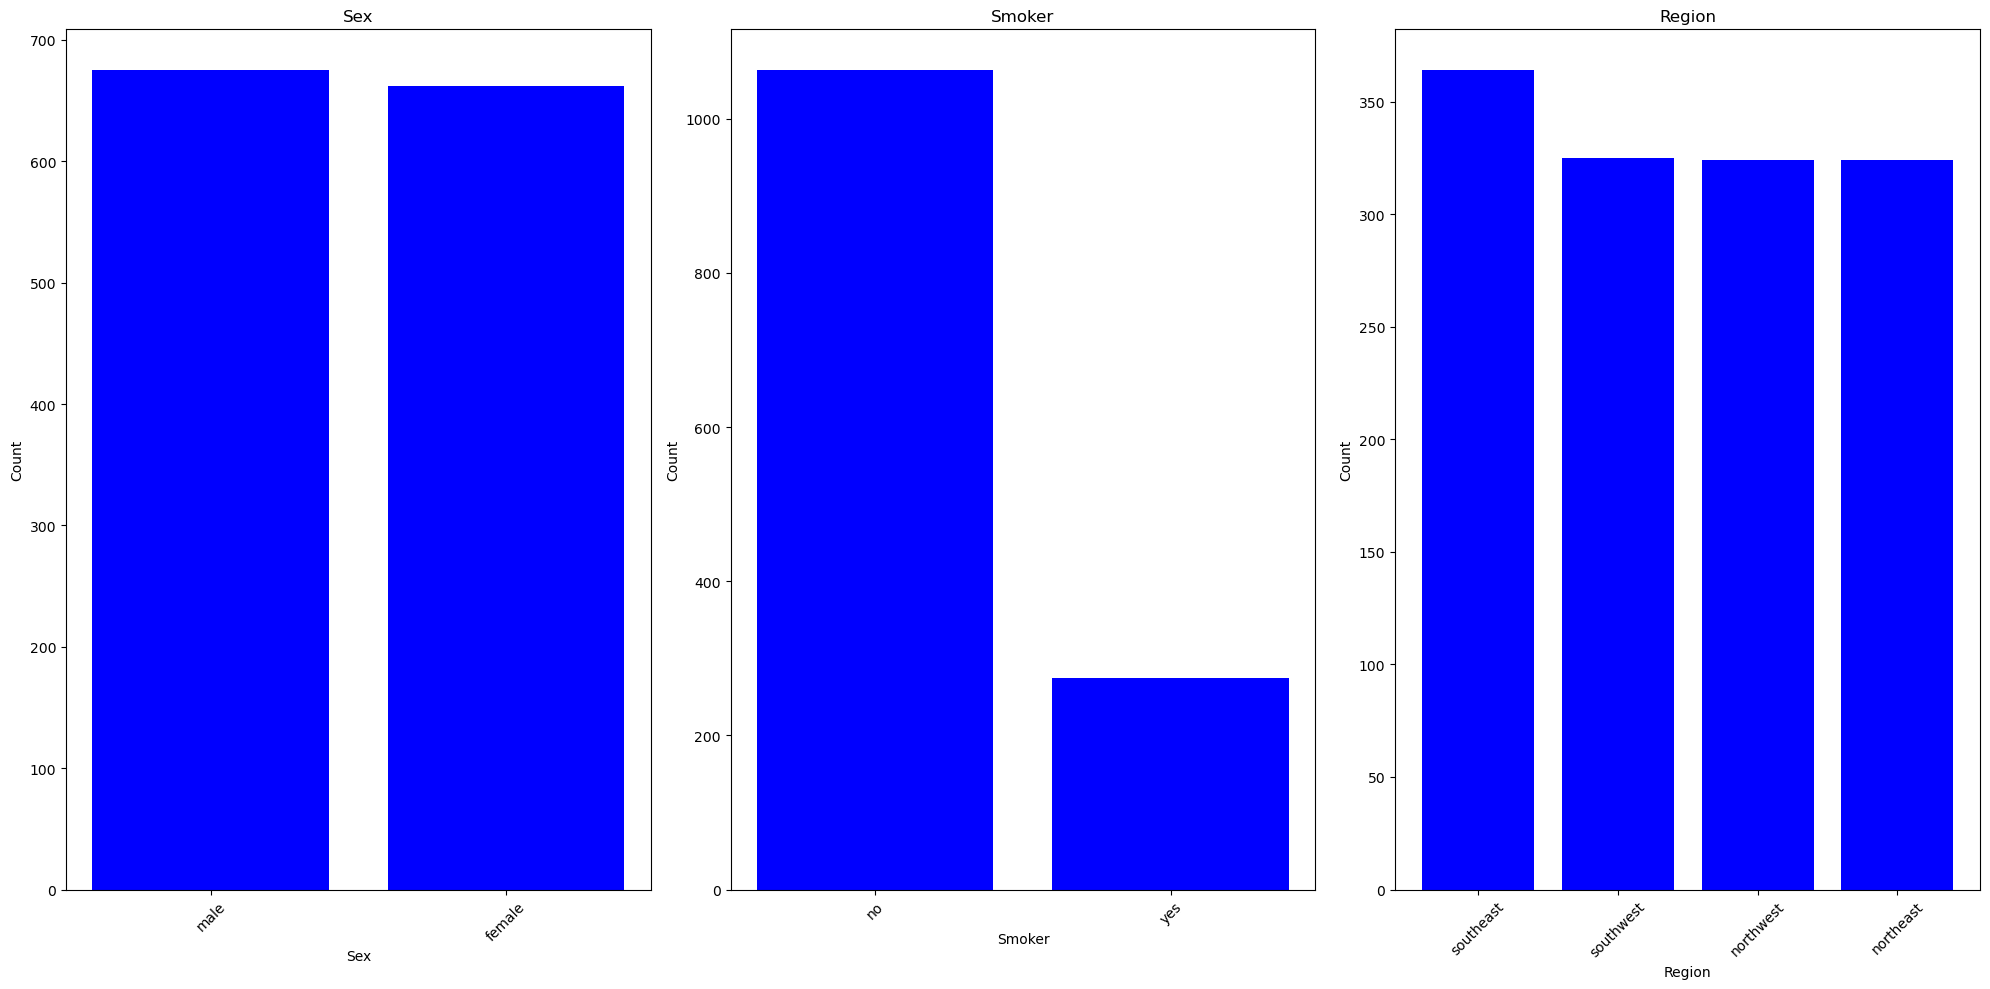

In [9]:
features = ['sex', 'smoker', 'region']

plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    
    x = df[col].value_counts()
    plt.bar(x.index, x.values, color='blue')
    
    plt.title(col.capitalize())
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##### Pie chart for the sex,smoker and region column

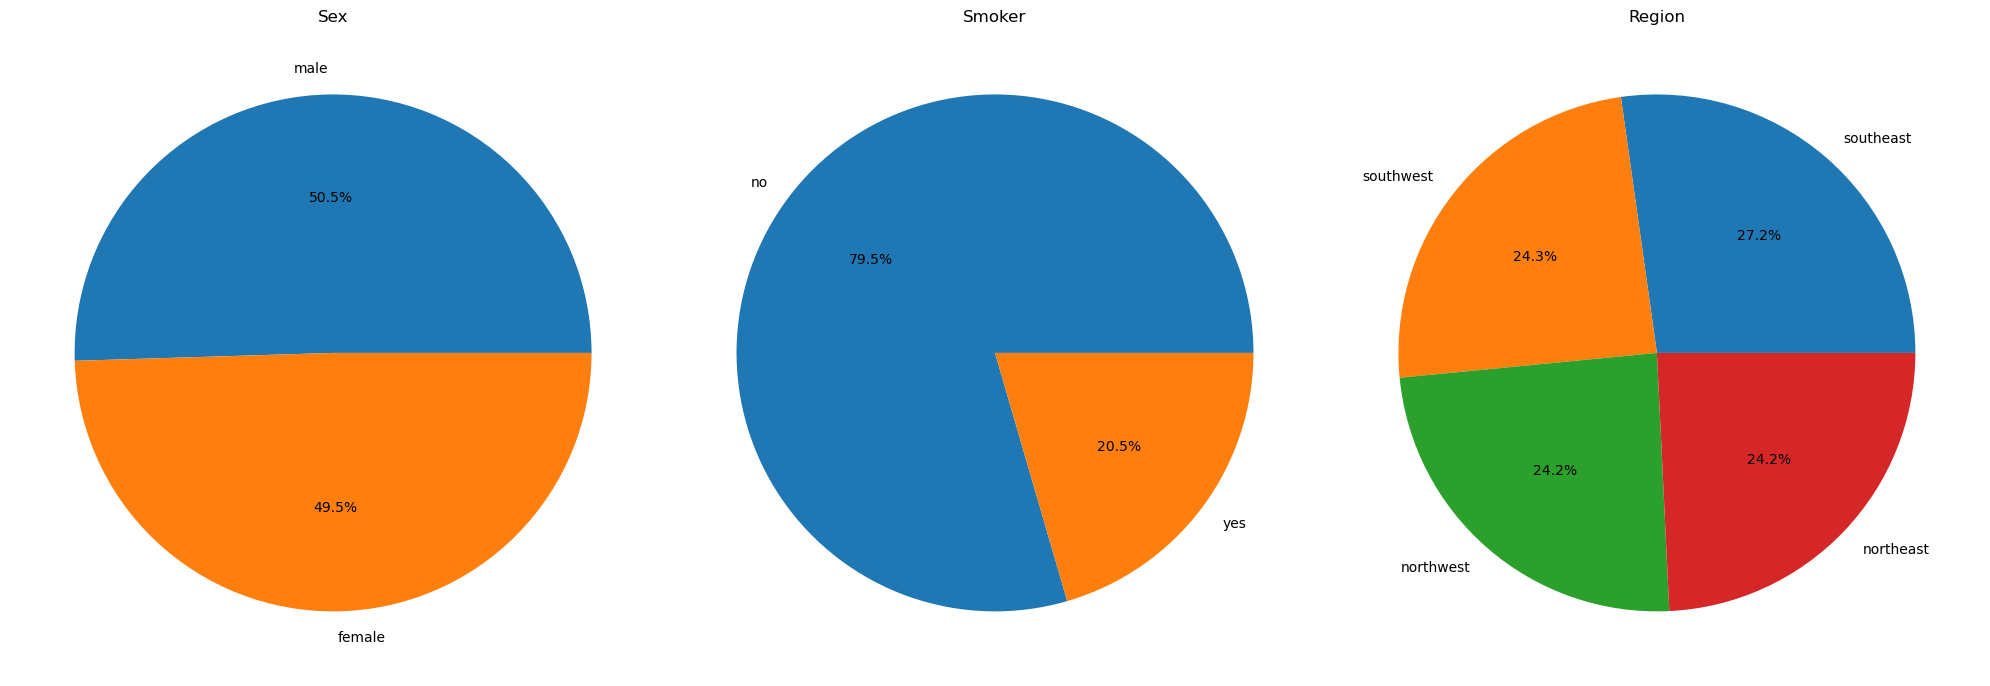

In [10]:
features = ['sex', 'smoker', 'region']

plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    
    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
    
    plt.title(col.capitalize())

plt.tight_layout()
plt.show()


##### 
From the above bar graph and pie chart we can understand that the data provided to us is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.

##### Comparison between charges paid between different groups

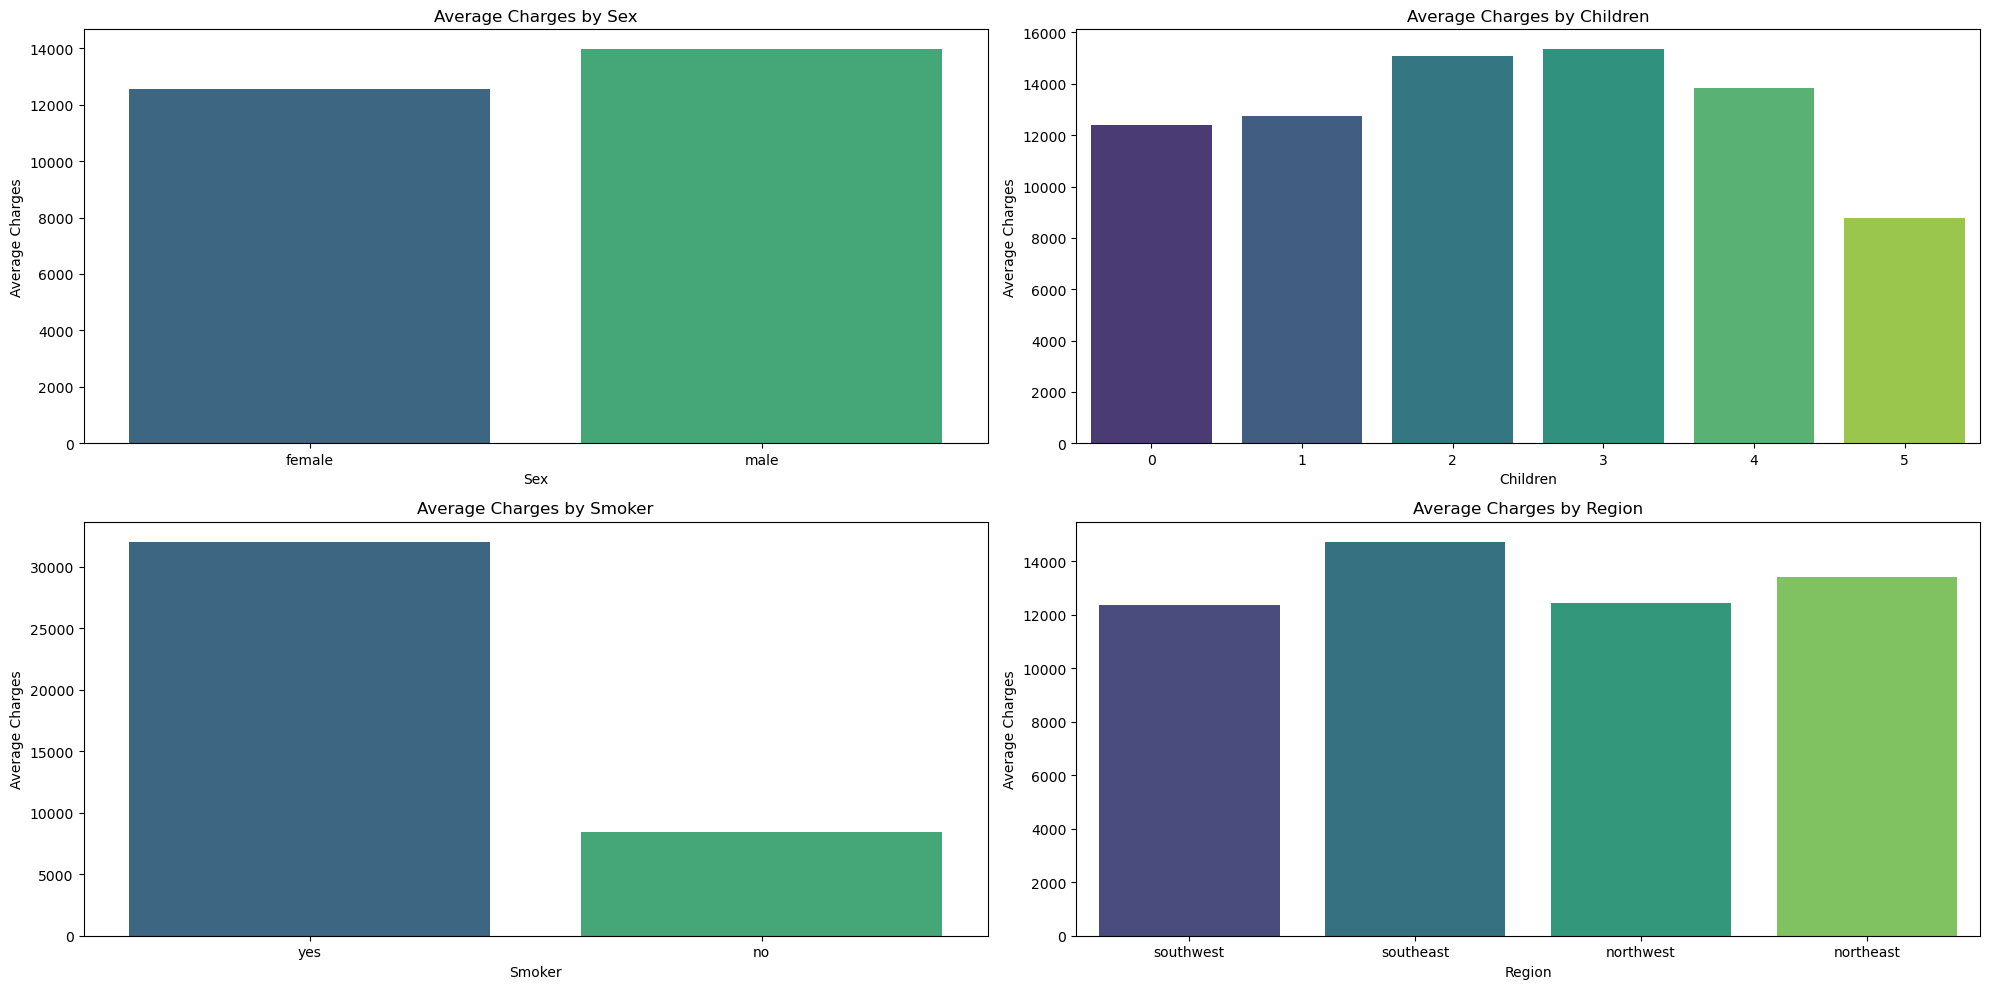

In [11]:
features = ['sex', 'children', 'smoker', 'region']
plt.figure(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=col, y='charges', data=df, estimator=lambda x: sum(x) / len(x),ci=None, palette='viridis')
    
    plt.title(f'Average Charges by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Charges')

plt.tight_layout()
plt.show()


##### Observations:
1. Charges are on the higher side for males as compared to females but the difference is not that much.
2. Premium charged from the smoker is around thrice that which is charged from non-smokers.
3. Charges are approximately the same in the given four regions.

##### Correlation Matrix and heatmap

In [12]:
#  Encoding
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [13]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.156784,0.198401
children,0.041536,-0.017848,0.012755,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156784,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,0.010767,1.000000


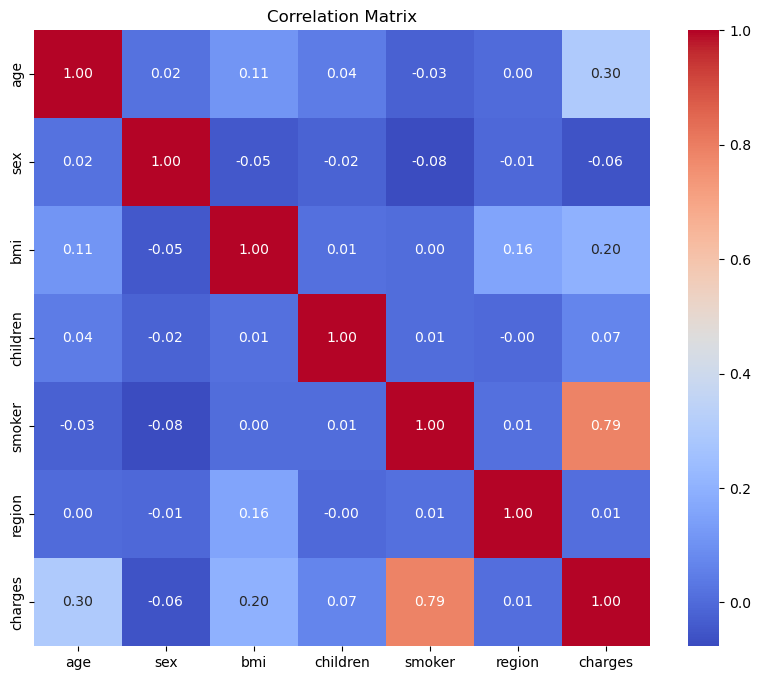

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

##### Scatter plot of the charges paid v/s age and BMI

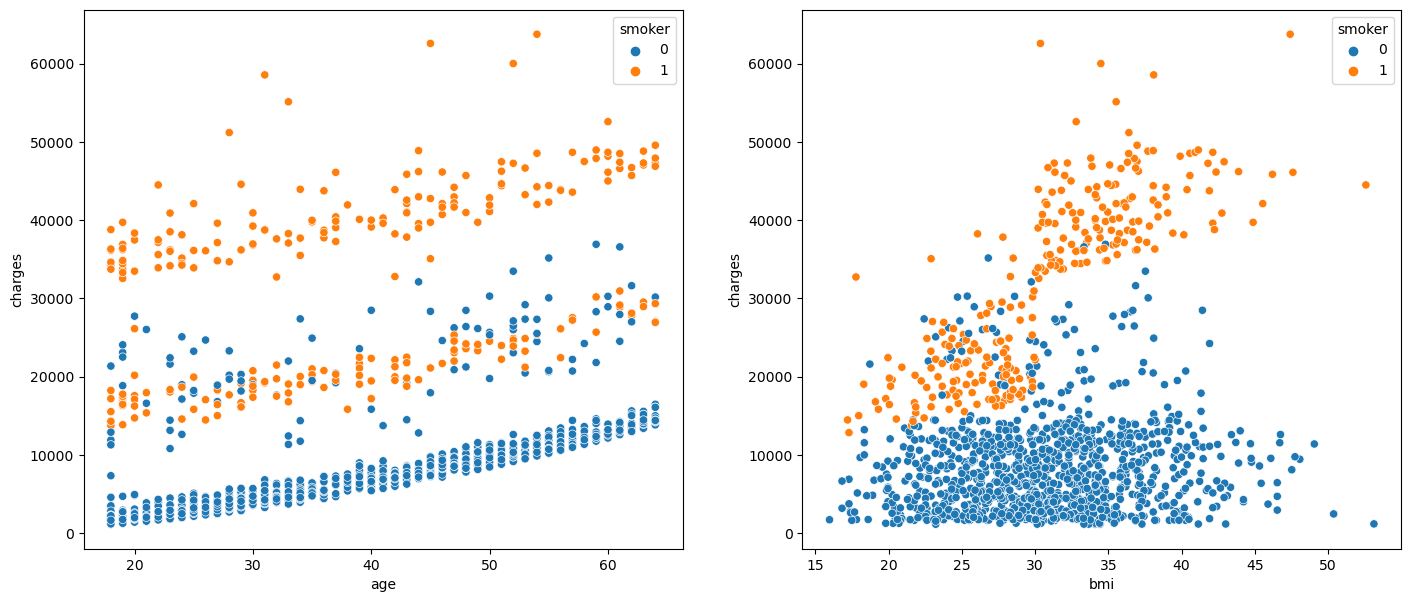

In [15]:

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()


A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.

#### Boxplot

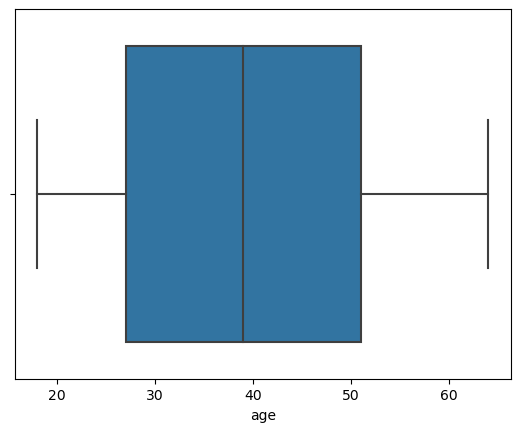

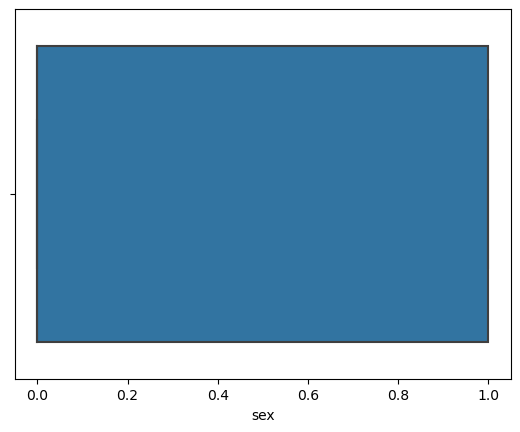

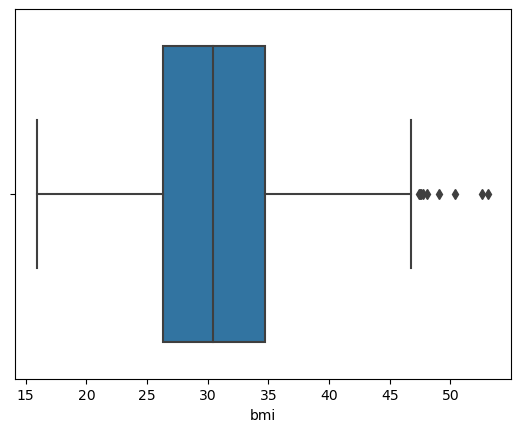

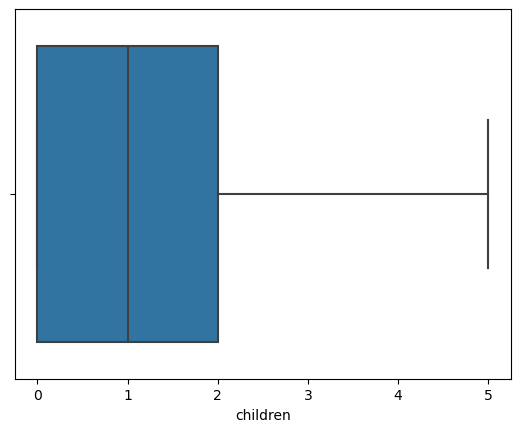

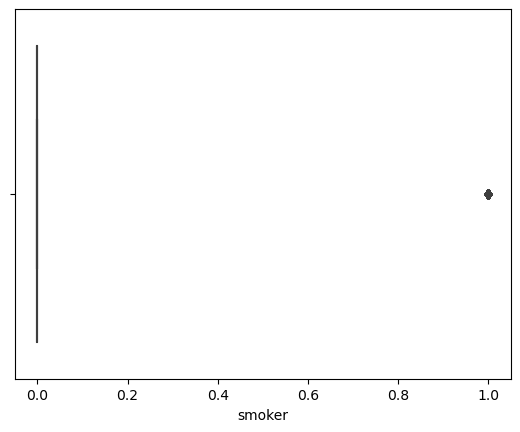

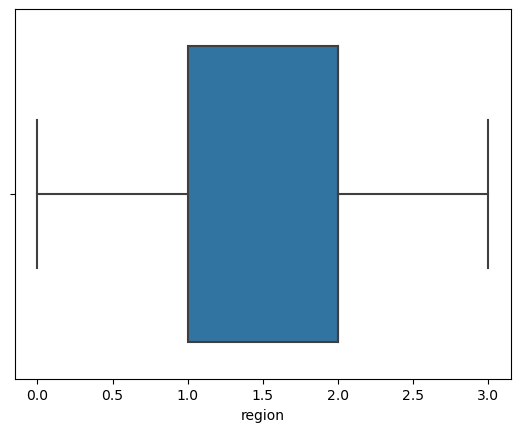

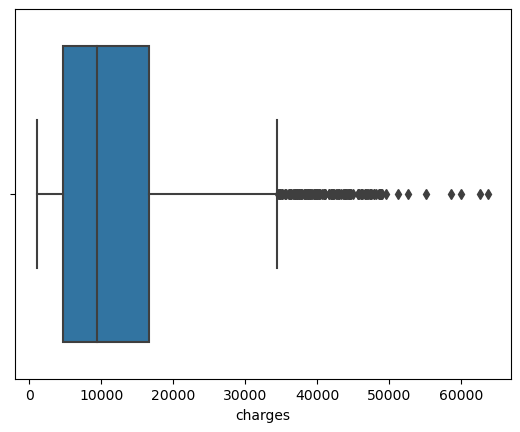

In [16]:
# Boxplot to identifier
for i in df.select_dtypes(include=['number']).columns:
    sns.boxplot(data=df, x=i)
    plt.show()

#### DATA PREPROCESSING

Data preprocessing is technique to clean the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.
From the above boxplot we can see that there are no outliers present in age column.
Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [17]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim.round(5))
print(upplim.round(4))

13.675
47.315


In [18]:
from feature_engine.outliers import ArbitraryOutlierCapper


<Axes: >

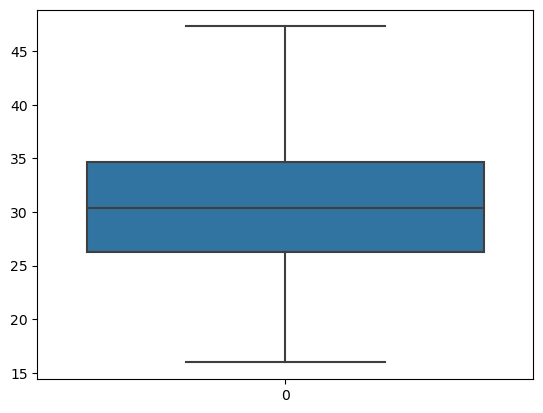

In [19]:
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.675},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

##### Data wrangling
 Checking whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [20]:
df['bmi'].skew()


0.23289153320569975

In [21]:
df['age'].skew()

0.054780773126998195

   ### Model Development

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
# Prepare features and target variable
X = df[['age','sex','bmi','children','smoker','region']]
Y = df['charges']

results = {
    'train_acc': [],
    'test_acc': [],
    'cvs': []
}

# Loop through different random states
for random_state in range(40, 50):
    # Split the data
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=random_state)
    
    # Create and train the model
    lrmodel = LinearRegression()
    lrmodel.fit(xtrain, ytrain)

    # Calculate accuracies
    train_score = lrmodel.score(xtrain, ytrain)
    test_score = lrmodel.score(xtest, ytest)
    cv_score = cross_val_score(lrmodel, X, Y, cv=5).mean()

    # Append results to the dictionary
    results['train_acc'].append(train_score)
    results['test_acc'].append(test_score)
    results['cvs'].append(cv_score)

# Create DataFrame from results
df1 = pd.DataFrame(results)

# Display the DataFrame
print(df1)

   train_acc  test_acc      cvs
0   0.741659  0.778409  0.74707
1   0.756401  0.706267  0.74707
2   0.729542  0.806239  0.74707
3   0.754260  0.732791  0.74707
4   0.742966  0.779591  0.74707
5   0.753281  0.731769  0.74707
6   0.741261  0.776456  0.74707
7   0.731940  0.796173  0.74707
8   0.751915  0.741742  0.74707
9   0.756348  0.722565  0.74707


In [23]:
results = {
    'model':["Linear","SVM","RandomForest","GradientBoost","XGBoost"],
    'train_acc': [],
    'test_acc': [],
    'cvs': []
}


In [24]:
# linear regression

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)

print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

0.7295415541376445
0.8062391115570589
0.7470697972809902


In [25]:

# Append results to the dictionary
results['train_acc'].append(lrmodel.score(xtrain,ytrain))
results['test_acc'].append(lrmodel.score(xtest,ytest))
results['cvs'].append(cross_val_score(lrmodel,X,Y,cv=5,).mean())
results

{'model': ['Linear', 'SVM', 'RandomForest', 'GradientBoost', 'XGBoost'],
 'train_acc': [0.7295415541376445],
 'test_acc': [0.8062391115570589],
 'cvs': [0.7470697972809902]}

In [26]:
# svr
from sklearn.svm import SVR 
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
train_score = r2_score(ytrain, ypredtrain1)
test_score = r2_score(ytest, ypredtest1)
cv_score = cross_val_score(svrmodel, X, Y, cv=5).mean()

In [27]:
 # Append results to the dictionary
results['train_acc'].append(r2_score(ytrain,ypredtrain1))
results['test_acc'].append(r2_score(ytest,ypredtest1))
results['cvs'].append(cross_val_score(svrmodel,X,Y,cv=5,).mean())


In [28]:
# randomforest regressor
from sklearn.ensemble import RandomForestRegressor 
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())


0.9738163260247533
0.8819423353068565
0.8363637309718952


In [29]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
train_score = r2_score(ytrain, ypredtrain2)
test_score = r2_score(ytest, ypredtest2)
cv_score = cross_val_score(rfmodel, X, Y, cv=5).mean()
# Append results to the dictionary
results['train_acc'].append(r2_score(ytrain,ypredtrain2))
results['test_acc'].append(r2_score(ytest,ypredtest2))
results['cvs'].append(cross_val_score(rfmodel,X,Y,cv=5,).mean())


{'n_estimators': 120}


In [30]:
# gbmodel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Import RandomForest and GradientBoosting
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())


0.8931345821166041
0.9042623603996134
0.8550006779395032


In [31]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
train_score = r2_score(ytrain, ypredtrain3)
test_score = r2_score(ytest, ypredtest3)
cv_score = cross_val_score(gbmodel, X, Y, cv=5).mean()
# Append results to the dictionary
results['train_acc'].append(r2_score(ytrain,ypredtrain3))
results['test_acc'].append(r2_score(ytest,ypredtest3))
results['cvs'].append(cross_val_score(gbmodel,X,Y,cv=5,).mean())


{'learning_rate': 0.2, 'n_estimators': 19}


In [32]:
# xgboost
from xgboost import XGBRegressor 
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.9954123497078247
0.8548937785039912
0.808125309217053


In [33]:
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
train_score = r2_score(ytrain, ypredtrain4)
test_score = r2_score(ytest, ypredtest4)
cv_score = cross_val_score(xgmodel, X, Y, cv=5).mean()
# Append results to the dictionary
results['train_acc'].append(r2_score(ytrain,ypredtrain4))
results['test_acc'].append(r2_score(ytest,ypredtest4))
results['cvs'].append(cross_val_score(xgmodel,X,Y,cv=5,).mean())


{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}


#### Comparing all models

In [34]:
# Create DataFrame from results
df2 = pd.DataFrame(results)

# Display the DataFrame
print(df2)

           model  train_acc  test_acc       cvs
0         Linear   0.729542  0.806239  0.747070
1            SVM  -0.101515 -0.134445 -0.103746
2   RandomForest   0.974638  0.882201  0.836744
3  GradientBoost   0.868240  0.901711  0.860604
4        XGBoost   0.869317  0.902246  0.860712


In [35]:
# Importance
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


In [36]:
# important_features
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.038633
bmi,0.133449
children,0.011073
smoker,0.809626


### CONCLUSION

Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.

The dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the real-life scenario. If we would have a bigger dataset then we will be able to learn even deeper patterns in the relation between the independent features and the premium charged from the buyers.